In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from keras import models
from keras import layers
from tensorflow.keras.metrics import CategoricalAccuracy

def get_clf(meta, hidden_layer_sizes, dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(n_features_in_,)))
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, activation="relu"))
    model.add(layers.Dense(3, activation='softmax'))
    return model

In [4]:
names = ["Logistic Regression", "Naive Bayes", 
         "Nearest Neighbors 3","Nearest Neighbors 5", "Nearest Neighbors 7", 
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis", 
         "Decision Tree 2", "Decision Tree Max", "Random Forest", 
         "SVM linear",  "SVM RBF kernel", "SVM Poly",  "SVM Sigmoid", "LinearSVC",
         'Keras NN 10 epochs', 'Keras NN 50 epochs', 'Keras NN 100 epochs', 'Keras NN 500 epochs']
np.random.seed(123)
classifiers = [
    LogisticRegression(C =  10000),
    GaussianNB(),
    KNeighborsClassifier(3),
    KNeighborsClassifier(5),
    KNeighborsClassifier(7),
    LinearDiscriminantAnalysis(solver="svd"),
    QuadraticDiscriminantAnalysis(),
    
    DecisionTreeClassifier(max_depth = 2,  random_state = 123),
    DecisionTreeClassifier( random_state = 123),
    RandomForestClassifier(n_estimators=25, random_state = 123),
    
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf', gamma=0.7),
    svm.SVC(kernel='poly', C=10, gamma=1),
    svm.SVC(kernel='sigmoid',C=100, gamma=0.01),
    LinearSVC(C =  100, max_iter = 30000),
    
    KerasClassifier(    model=get_clf,    loss='categorical_crossentropy',    optimizer='adam',      model__hidden_layer_sizes= (16, 32, ),    model__dropout=0.5,    metrics=[CategoricalAccuracy(name='accuracy')],    epochs=10,     batch_size=10,    verbose=0   ),  
    KerasClassifier(    model=get_clf,    loss='categorical_crossentropy',    optimizer='adam',      model__hidden_layer_sizes= (16, 32, ),    model__dropout=0.5,    metrics=[CategoricalAccuracy(name='accuracy')],    epochs=50,     batch_size=10,    verbose=0   ),
    KerasClassifier(    model=get_clf,    loss='categorical_crossentropy',    optimizer='adam',      model__hidden_layer_sizes= (16, 32, ),    model__dropout=0.5,    metrics=[CategoricalAccuracy(name='accuracy')],    epochs=100,     batch_size=10,    verbose=0   ),
    KerasClassifier(    model=get_clf,    loss='categorical_crossentropy',    optimizer='adam',      model__hidden_layer_sizes= (16, 32, ),    model__dropout=0.5,    metrics=[CategoricalAccuracy(name='accuracy')],    epochs=500,     batch_size=10,    verbose=0   )
    ]

In [5]:
import pandas as pd
import numpy as np 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import preprocessing

iris = load_iris(as_frame=True)
x_label='sepal length (cm)'
y_label='petal length (cm)'

X=iris.frame[[x_label, y_label]]
y = iris.frame['target']
target_names = iris.target_names
# перемешиваем данные с равномерным распределение по выборкам

scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
#попробуем сделать равномерным распределение по выборкам
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=123, stratify=y)
h = .01  # step size in the mesh
x_min, x_max = X.min()[x_label] - 0.1, X.max()[x_label] + 0.1
y_min, y_max = X.min()[y_label] - 0.1, X.max()[y_label] + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cmap_light = ListedColormap(['blue', 'orange', 'green'])
cmap_bold = ListedColormap(['darkblue', 'darkorange', 'darkgreen'])

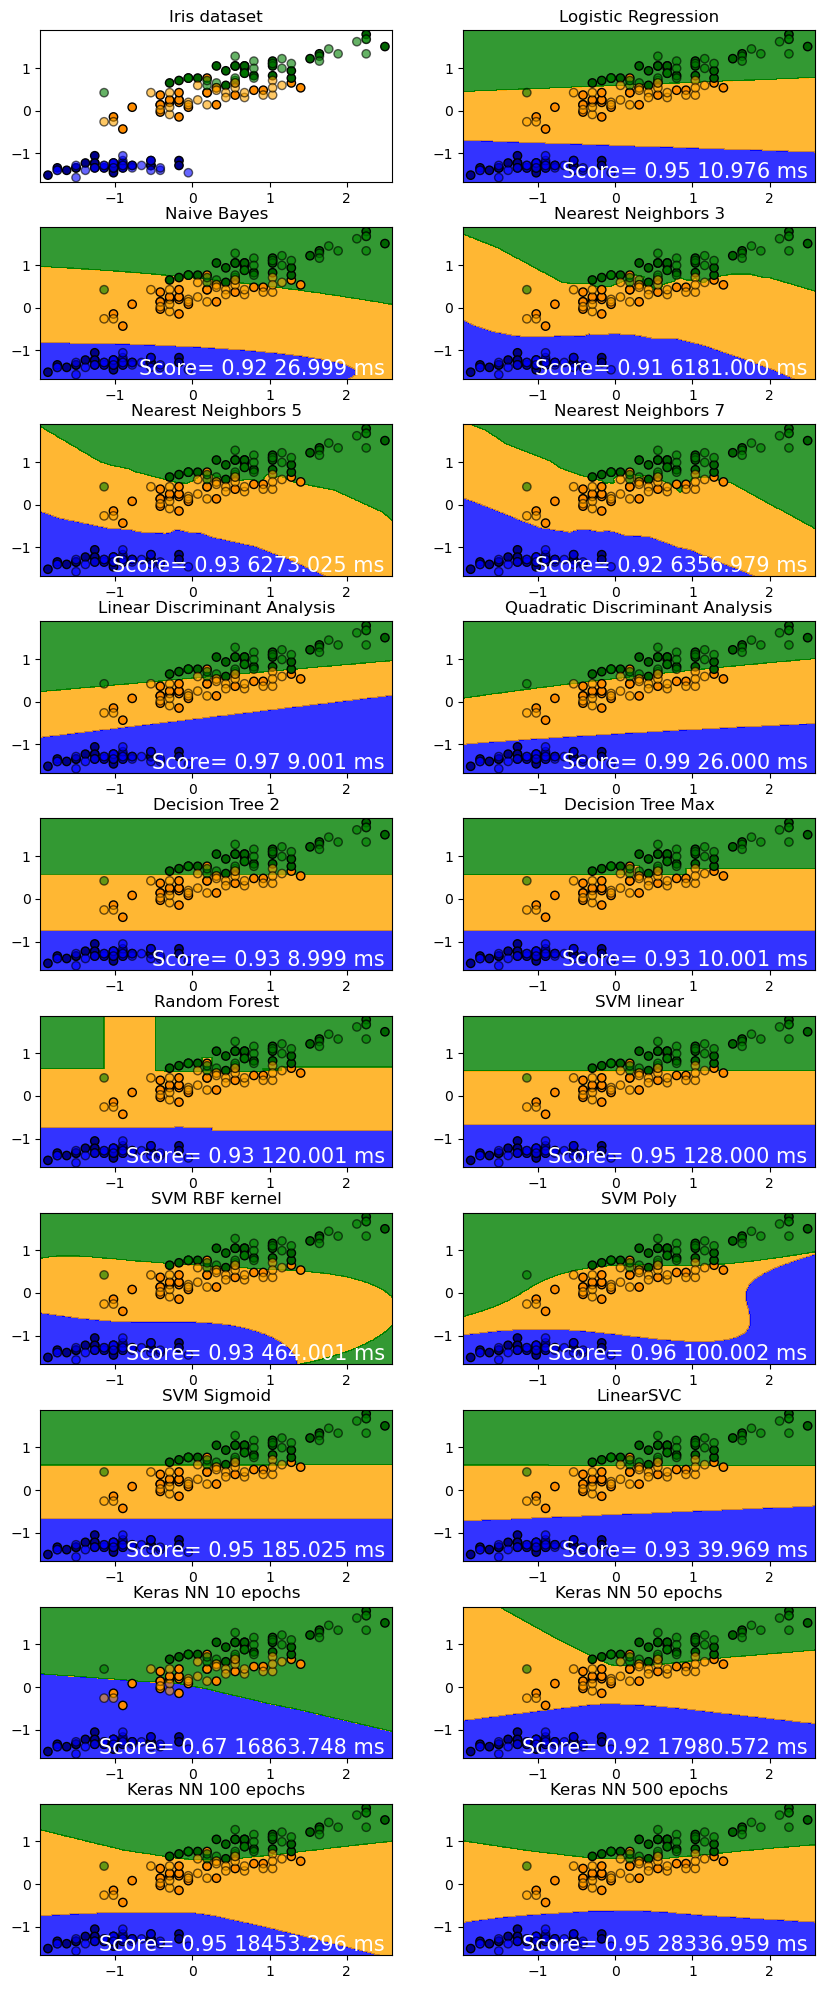

In [8]:
#%matplotlib notebook
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import time

fig = plt.figure(figsize=(10,25))

# Draw dataset

ax = plt.subplot(10, 2, 1)

# Plot the training points
ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_bold, alpha=1.0, edgecolor="black")
ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_light, alpha=0.6, edgecolor="black")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Iris dataset")

results = []

# iterate over classifiers
i = 2
for name, clf in zip(names, classifiers):
    ax = plt.subplot(10, 2, i)
    t0 = time.time()
    
    clf.fit(X_train.values, y_train)
    score = clf.score(X_test.values, y_test)
    
    clf_pred = clf.predict(X_test.values)
    clf_acc = accuracy_score(y_test, clf_pred)
        
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    t1 = time.time()
  
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=.8)
   
    # Plot the training points
    ax.scatter(x=X_train[x_label], y=X_train[y_label], c=y_train, cmap=cmap_bold, alpha=1.0, edgecolor="black")
    ax.scatter(x=X_test[x_label], y=X_test[y_label], c=y_test, cmap=cmap_light, alpha=0.6, edgecolor="black")
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(name)
    
    dt=(t1 - t0)*1000

    results.append([name,score,dt])

    
    ax.text(xx.max() - .1, yy.min() + .1, ('Score= %.2f %.3f ms' % (score,dt)).lstrip('0'), 
            size=15, horizontalalignment='right', color='w')
    i += 1
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

In [9]:
pd.DataFrame(data=results,columns=['Классификатор', 'Метрика', 'Время, мсек.'])   

,Классификатор,Метрика,"Время, мсек."
0,Logistic Regression,0.946667,10.976076
1,Naive Bayes,0.920000,26.998997
2,Nearest Neighbors 3,0.906667,6180.999517
3,Nearest Neighbors 5,0.933333,6273.025274
4,Nearest Neighbors 7,0.920000,6356.978893
5,Linear Discriminant Analysis,0.973333,9.001493
6,Quadratic Discriminant Analysis,0.986667,25.999546
7,Decision Tree 2,0.933333,8.999109
8,Decision Tree Max,0.933333,10.000944
9,Random Forest,0.933333,120.000601
